In [ ]:
pip install deepface

In [ ]:
pip install opencv-python

In [ ]:
#Importing required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import networkx as nx
import cv2
from deepface import DeepFace
from retinaface import RetinaFace
import random
import glob
import plotly.express as px
#!pip install pyyaml==5.4.1

In [ ]:
#Load the dataset CSV file
SPD = pd.read_csv("/content/student-por.csv")

In [ ]:
SPD.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


Attribute Information: (taken from archive.ics.uci.edu)
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
#Display the info of Student performance data (SPD)
SPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
#display the shape of the data
print('Data Shape:',SPD.shape)
print('Data Size:',SPD.size)

Data Shape: (649, 33)
Data Size: 21417


In [ ]:
#checking for null values
SPD.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
#checking for Nan value
SPD.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
SPD.skew()

age           0.416795
Medu         -0.029950
Fedu          0.215343
traveltime    1.247648
studytime     0.699619
failures      3.092699
famrel       -1.105934
freetime     -0.181277
goout        -0.008580
Dalc          2.141913
Walc          0.635904
health       -0.500656
absences      2.020694
G1           -0.002774
G2           -0.360283
G3           -0.912909
dtype: float64

In [ ]:
#Drop the duplicates
SPD.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


***Emotion Recognition using Retina and Deep Face***

In [ ]:
image_list = []
for filename in glob.glob('/content/drive/MyDrive/photos/*'):
    image_list.append(filename)

In [ ]:
range(len(image_list))

range(0, 803)

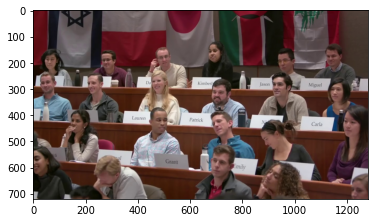

There are  22  faces in the image


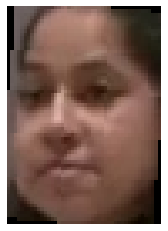

Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]



Emotion:  happy 
Age:  31 
Race:  latino hispanic 
Gender:  Man
------------------------


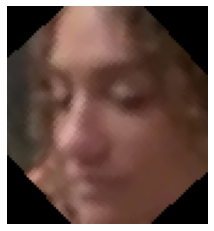

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Emotion:  neutral 
Age:  35 
Race:  middle eastern 
Gender:  Man
------------------------


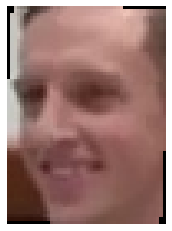

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Emotion:  happy 
Age:  35 
Race:  white 
Gender:  Man
------------------------


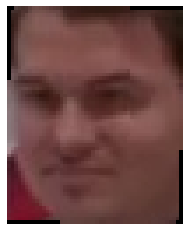

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]


Emotion:  angry 
Age:  28 
Race:  white 
Gender:  Man
------------------------


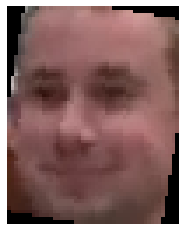

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


Emotion:  happy 
Age:  28 
Race:  white 
Gender:  Man
------------------------


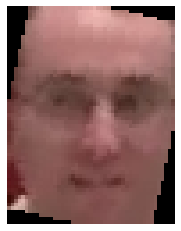

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


Emotion:  neutral 
Age:  29 
Race:  white 
Gender:  Man
------------------------


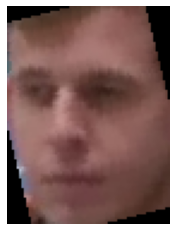

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


Emotion:  neutral 
Age:  27 
Race:  white 
Gender:  Man
------------------------


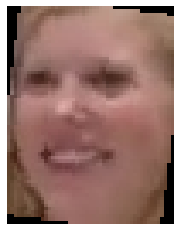

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]


Emotion:  happy 
Age:  39 
Race:  white 
Gender:  Woman
------------------------


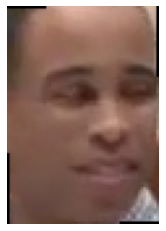

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


Emotion:  neutral 
Age:  31 
Race:  black 
Gender:  Man
------------------------


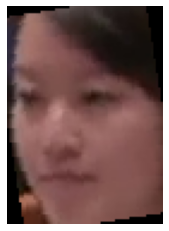

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


Emotion:  angry 
Age:  33 
Race:  asian 
Gender:  Woman
------------------------


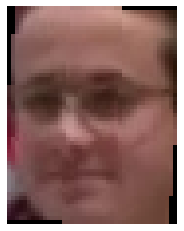

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]


Emotion:  happy 
Age:  39 
Race:  white 
Gender:  Man
------------------------


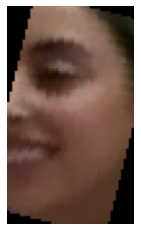

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


Emotion:  happy 
Age:  33 
Race:  latino hispanic 
Gender:  Woman
------------------------


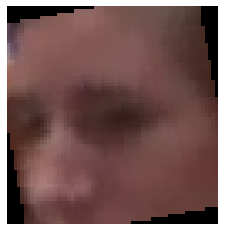

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


Emotion:  sad 
Age:  28 
Race:  white 
Gender:  Man
------------------------


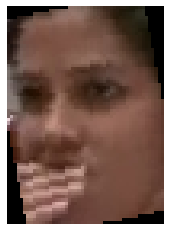

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


Emotion:  happy 
Age:  29 
Race:  latino hispanic 
Gender:  Woman
------------------------


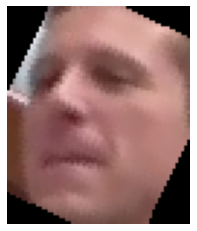

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]


Emotion:  fear 
Age:  28 
Race:  white 
Gender:  Man
------------------------


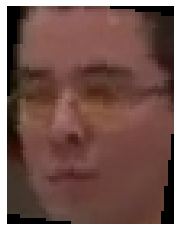

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]


Emotion:  neutral 
Age:  26 
Race:  white 
Gender:  Man
------------------------


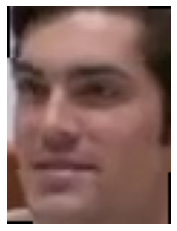

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


Emotion:  happy 
Age:  30 
Race:  white 
Gender:  Man
------------------------


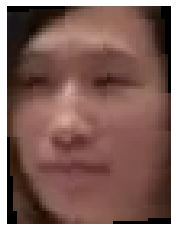

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


Emotion:  neutral 
Age:  27 
Race:  asian 
Gender:  Man
------------------------


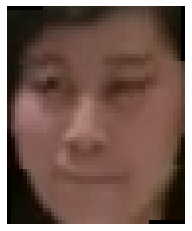

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


Emotion:  neutral 
Age:  30 
Race:  asian 
Gender:  Man
------------------------


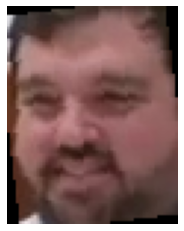

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


Emotion:  neutral 
Age:  37 
Race:  middle eastern 
Gender:  Man
------------------------


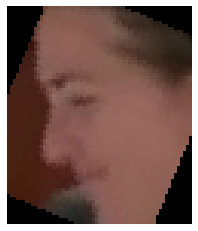

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


Emotion:  sad 
Age:  33 
Race:  white 
Gender:  Man
------------------------


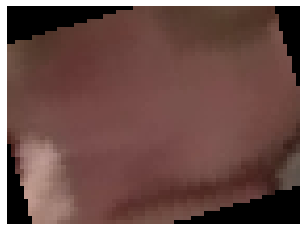

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


Emotion:  neutral 
Age:  33 
Race:  white 
Gender:  Man
------------------------


In [ ]:
random_num = random.randint(0, 803)

faces = RetinaFace.extract_faces(image_list[random_num])

img = cv2.imread(image_list[random_num])

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print("There are ", len(faces), " faces in the image")

for face in faces:
    plt.imshow(face)
    plt.axis('off')
    plt.show()
    
    obj = DeepFace.analyze(face, detector_backend = 'skip', enforce_detection= False)
    print("\nEmotion: " , obj['dominant_emotion'] , "\nAge: " , str(obj['age']) , "\nRace: " , obj['dominant_race'] , "\nGender: " , obj['gender'])
    print("------------------------")

In [ ]:
dominant_emotion = []

r = list(range(len(image_list)))
random.shuffle(r)
for i in r:

  img = cv2.imread(image_list[i])
  
  faces = RetinaFace.extract_faces(image_list[i])
  
  for face in faces:
    obj = DeepFace.analyze(face, detector_backend = 'skip', enforce_detection= False)
    dominant_emotion.append(obj['dominant_emotion'])
    if (len(dominant_emotion) == 649):
      print("\n Collected 649 emotions")
      break
  else:
    continue
  break

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


 Collected 649 emotions


In [ ]:
# function to get unique values
def unique(list1):
     
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    return unique_list

In [ ]:
unique_emotion_list = unique(dominant_emotion)
unique_emotion_list

['neutral', 'sad', 'surprise', 'fear', 'happy', 'angry']

In [ ]:
for i in range(len(unique_emotion_list)):
  count = dominant_emotion.count(unique_emotion_list[i])
  print(unique_emotion_list[i], ": ", count)

neutral :  229
sad :  193
surprise :  6
fear :  108
happy :  35
angry :  78


***Create a emotions column from the above retrieved emotions***

In [ ]:
SPD['emotions'] = np.array(dominant_emotion)

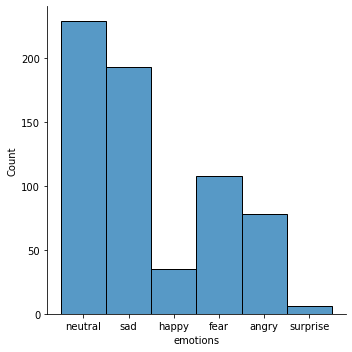

In [ ]:
sns.displot(SPD, x="emotions", discrete=True)

***Create an average column from G1, G2, G3 grades***

In [ ]:
def avg_of_G1_G2_G3():
    columns = ['G1', 'G2', 'G3']
    SPD['avg_of_G1_G2_G3'] = SPD[columns].mean(axis=1)

In [ ]:
avg_of_G1_G2_G3()

Grade the students based on the average

Fail is considered based on below 40% which is below 8.

The ranges are:
Fail - (0, 8], Third - (8, 10], Lower Second - (10, 13], Upper Second - (13, 16], First - (16, 20]

In [ ]:
def grade_classification():
    bins = pd.IntervalIndex.from_tuples(
        [(0, 8), (8, 10), (10, 13), (13, 16), (16, 20)], closed='right')

    levels = ['fail', 'Third', 'Lower Second', 'Upper Second', 'First']

    new_column = 'Grades'
    SPD[new_column] = np.array(levels)[
        pd.cut(SPD['avg_of_G1_G2_G3'], bins=bins).cat.codes]

In [ ]:
grade_classification()

In [ ]:
SPD

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,emotions,avg_of_G1_G2_G3,Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,neutral,7.333333,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,sad,10.333333,Lower Second
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,sad,12.333333,Lower Second
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,happy,14.000000,Upper Second
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,sad,12.333333,Lower Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,1,2,5,4,10,11,10,happy,10.333333,Lower Second
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,4,15,15,16,fear,15.333333,Upper Second
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,5,6,11,12,9,angry,10.666667,Lower Second
647,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,6,10,10,10,fear,10.000000,Third


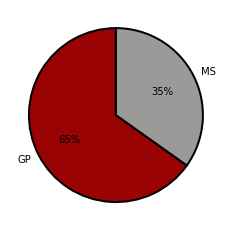

In [ ]:
plt.pie(SPD['school'].value_counts(),
        labels = ["GP", "MS"],
        colors = ["#990303", "#9C9999"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

Text(0.5, 1.0, 'Correlation Heatmap')

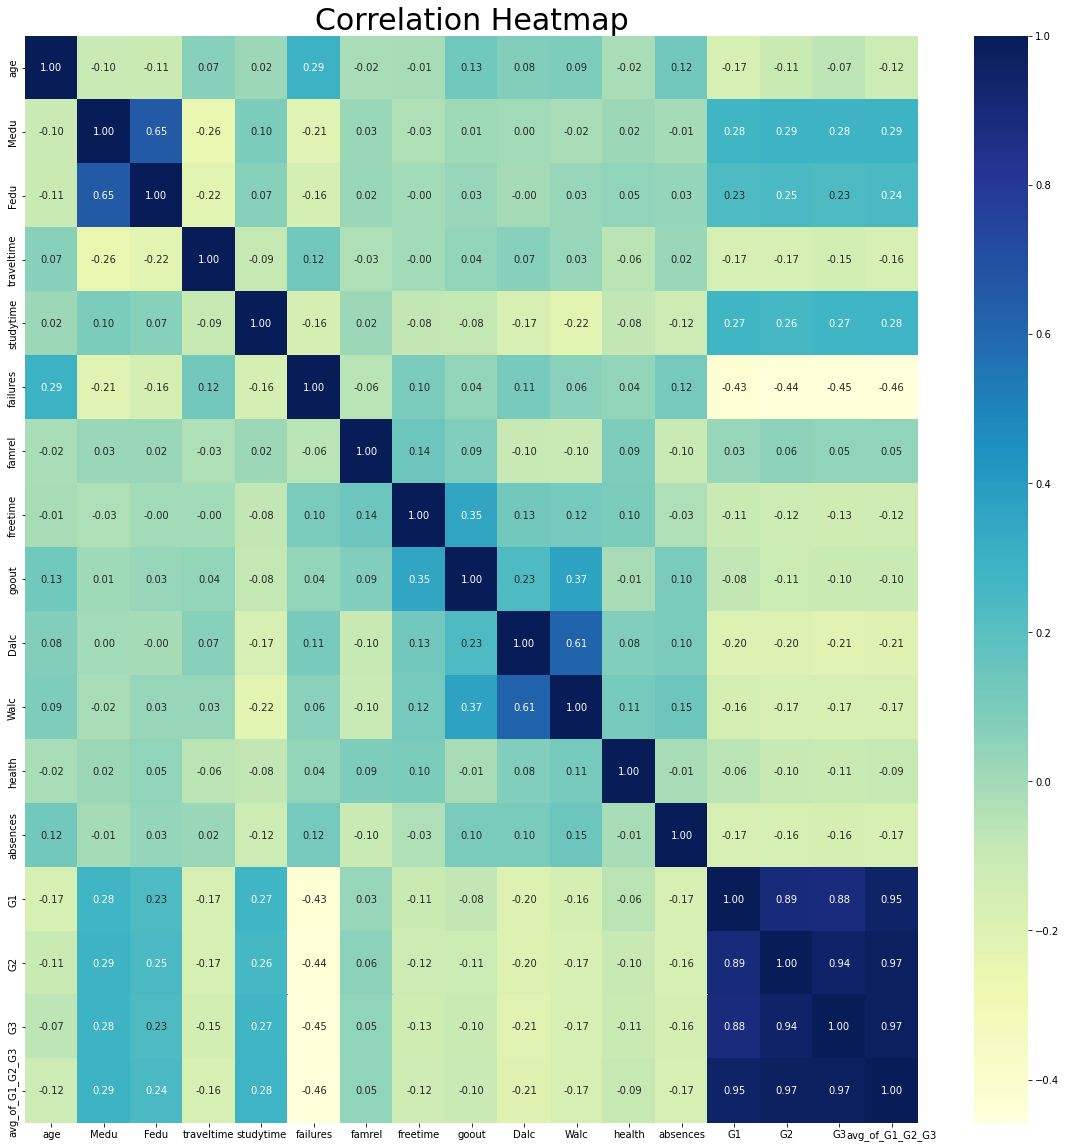

In [ ]:
#correlation heatmap
corr=SPD.corr(method='spearman', min_periods=1)

plt.figure(figsize=(20,20))
sns.heatmap(corr, fmt='.2f', annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=30)

In [ ]:
def Categorical_Quantitative_Insights(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 4
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(35, 95))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.scatterplot(data=SPD, x=column,
                        y='avg_of_G1_G2_G3', ax=ax[0], hue='Grades')

        ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
                     ncol=5, fancybox=True, shadow=True)
        
        sns.countplot(data=SPD,
                      x='Grades', hue=column, ax=ax[1])

        sns.stripplot(data=SPD, x=column, y='avg_of_G1_G2_G3', ax=ax[2])

        sns.boxplot(data=SPD, x=column,
                    y='avg_of_G1_G2_G3', ax=ax[3])


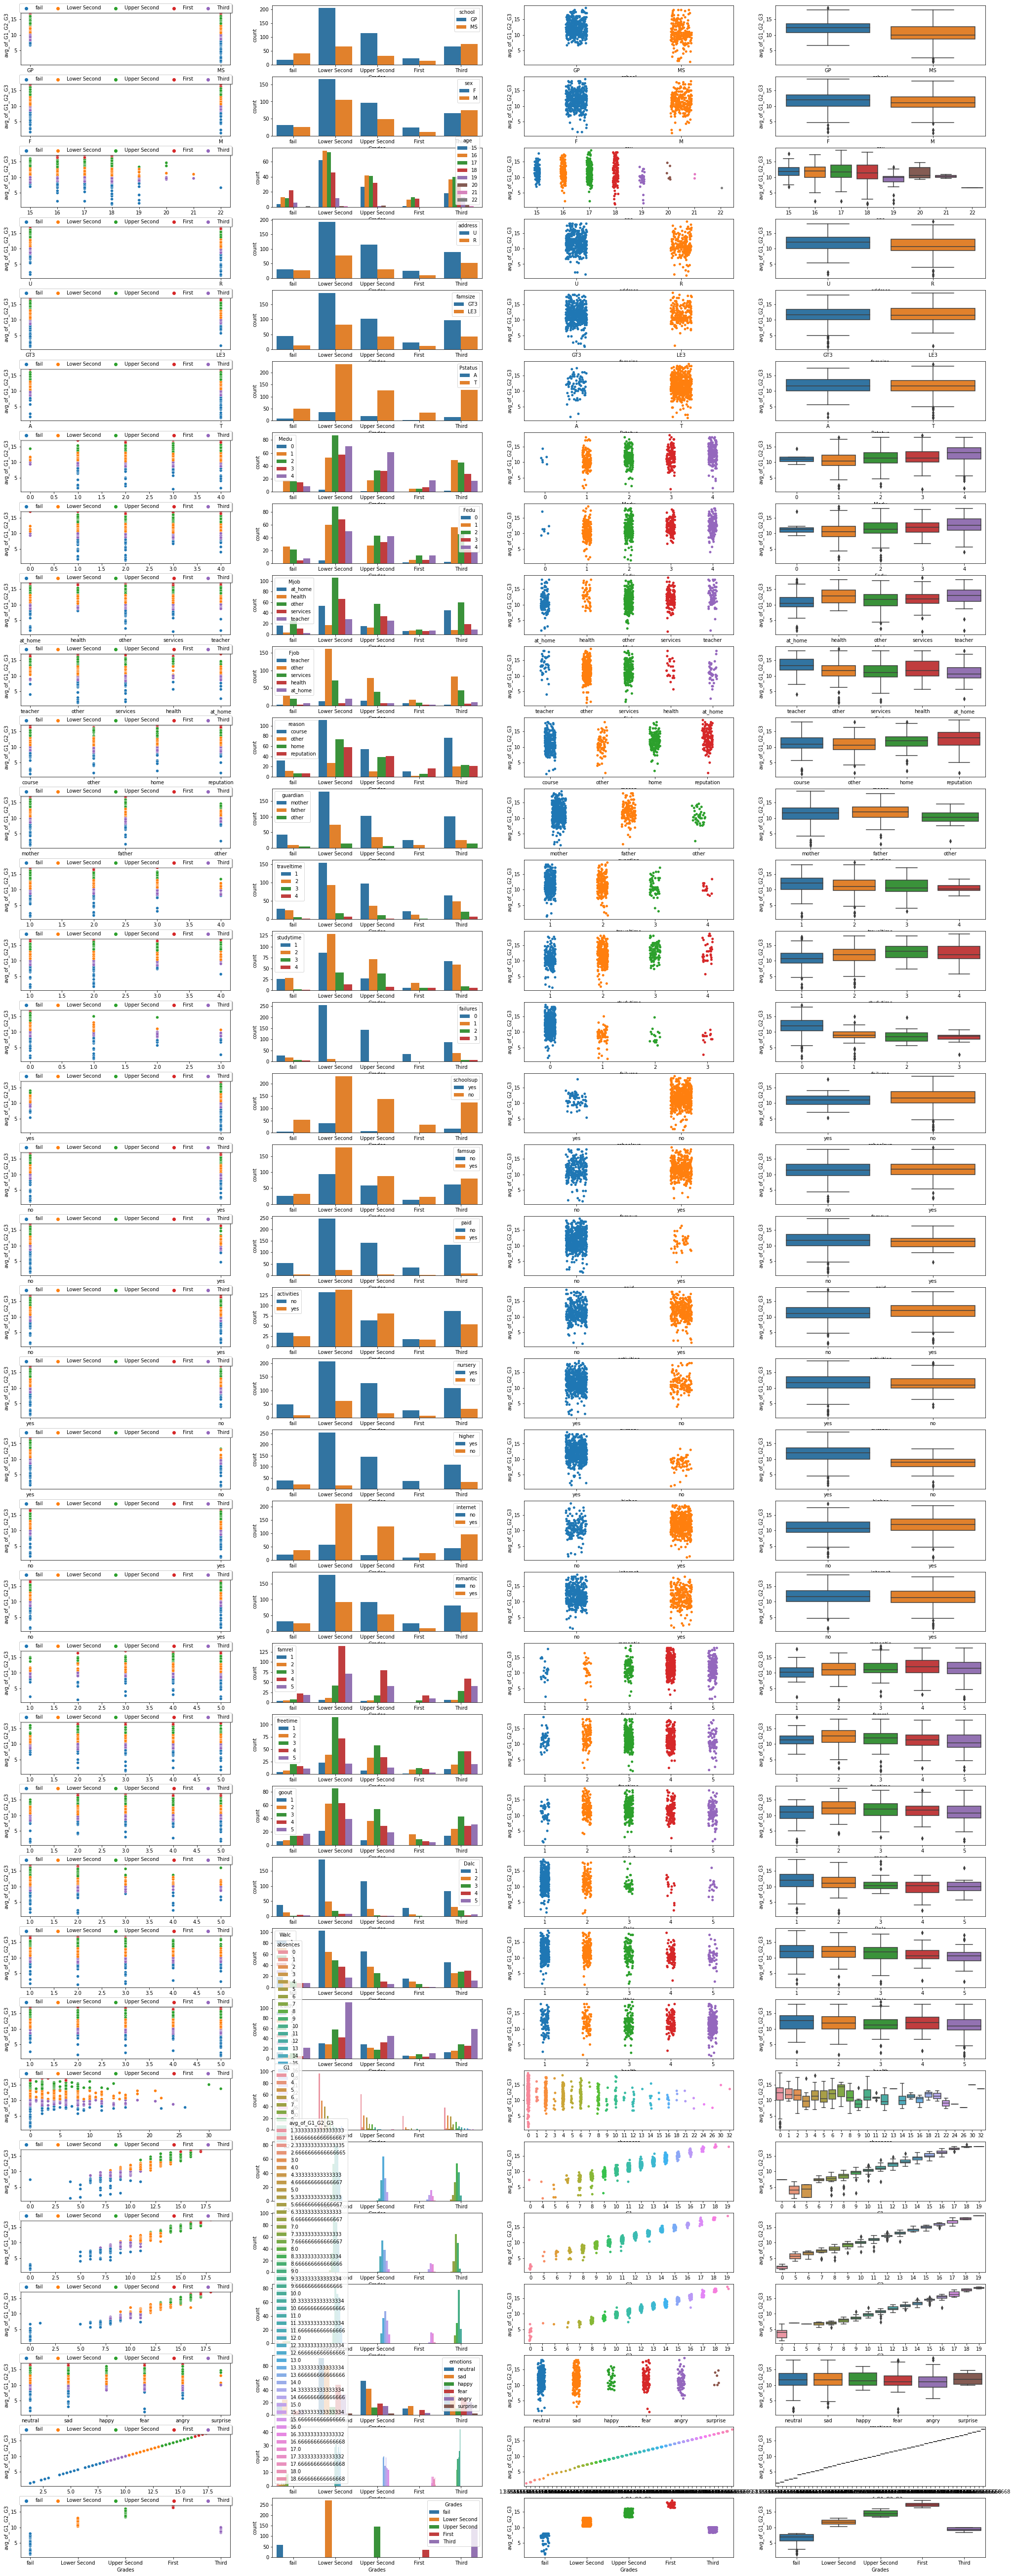

In [ ]:
columns = SPD.select_dtypes(include=['int64', 'float64', 'object'])
Categorical_Quantitative_Insights(columns)

In [ ]:
def plot_grades_to_self():
    nrows, ncols = 1, 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 9))
    sns.countplot(data=SPD,
                  y='Grades', ax=axes[0], hue='Grades')

    sns.violinplot(data=SPD,
                y='Grades', x='avg_of_G1_G2_G3', ax=axes[1], palette="Set2",
                    scale="count", hue='Grades')

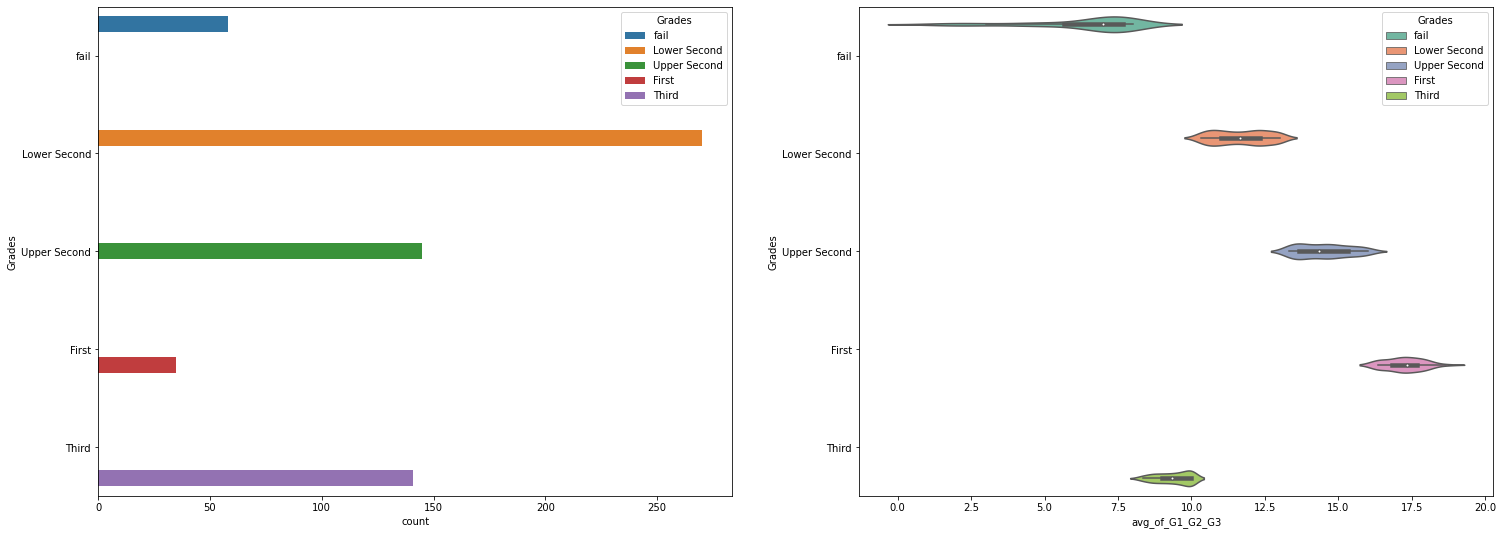

In [ ]:
plot_grades_to_self()

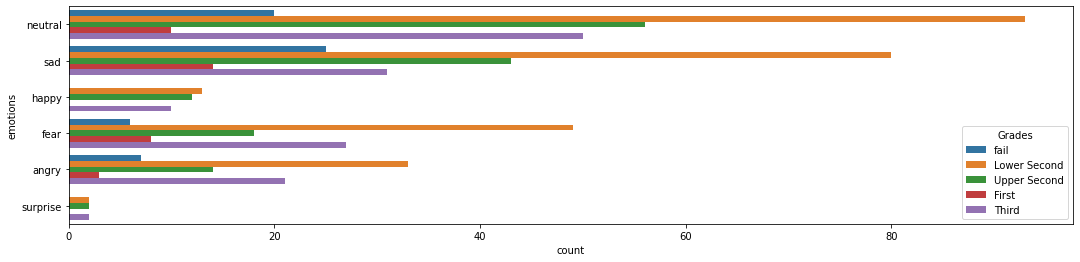

In [ ]:
nrows, ncols = 1, 1
_, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4))
sns.countplot(data=SPD, y='emotions', hue='Grades')

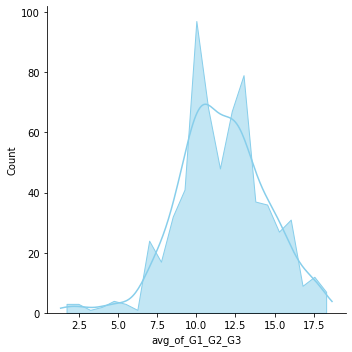

In [ ]:
sns.displot(data=SPD['avg_of_G1_G2_G3'],
            element='poly', kde=True, color='skyblue')

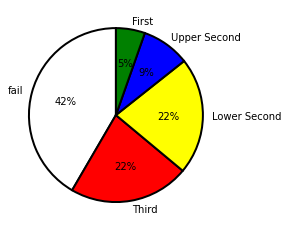

In [ ]:
plt.pie(SPD['Grades'].value_counts(),
        labels = ['fail', 'Third', 'Lower Second', 'Upper Second', 'First'],
        colors = ["White", "Red", "Yellow", "Blue", "Green"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

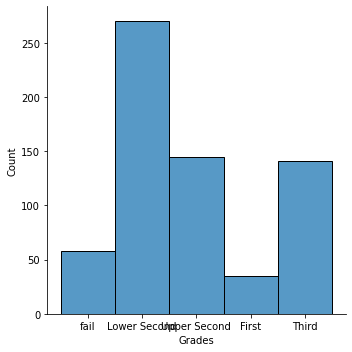

In [ ]:
sns.displot(SPD, x="Grades", discrete=True)

In [ ]:
print("mean: ",SPD.mean())
print("variance: ",SPD.var())
print("standart deviation (std): ",SPD.std())
print("describe method: ",SPD.describe())

mean:  age                16.744222
Medu                2.514638
Fedu                2.306626
traveltime          1.568567
studytime           1.930663
failures            0.221880
famrel              3.930663
freetime            3.180277
goout               3.184900
Dalc                1.502311
Walc                2.280431
health              3.536210
absences            3.659476
G1                 11.399076
G2                 11.570108
G3                 11.906009
avg_of_G1_G2_G3    11.625064
dtype: float64
variance:  age                 1.483859
Medu                1.287208
Fedu                1.209848
traveltime          0.560492
studytime           0.688086
failures            0.351928
famrel              0.913395
freetime            1.104796
goout               1.382426
Dalc                0.855319
Walc                1.649632
health              2.091665
absences           21.536642
G1                  7.536481
G2                  8.489290
G3                 10.437140
avg_of_G1_

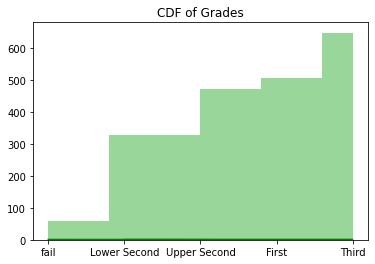

In [ ]:
plt.hist(SPD['Grades'],bins=10,fc=(0,0.6,0,0.4),histtype = 'stepfilled', cumulative = True,)
sorted_data = np.sort(SPD['Grades'],)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='Green')
plt.title('CDF of Grades')
plt.show()

In [ ]:
mean_diff = SPD['G3'].mean() - SPD['avg_of_G1_G2_G3'].mean()
var_bening = SPD['G3'].var()
var_malignant = SPD['avg_of_G1_G2_G3'].var()
var_pooled = (len(SPD['G3'])*var_bening +len(SPD['avg_of_G1_G2_G3'])*var_malignant ) / float(len(SPD['G3'])+ len(SPD['avg_of_G1_G2_G3']))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  0.09246149060182042


In [ ]:
#pearson coeffiecient
SPD[["age","avg_of_G1_G2_G3"]].corr()
#p-value
pearson_coef , p_value=stats.pearsonr(SPD["age"],SPD["avg_of_G1_G2_G3"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.13349865498491356  with a P-value of P = 0.0006504408411431509


In [ ]:
#using backward elimination for finding optimal featrures

#if p-value is greater than 0.6 than we will removethat feature
import statsmodels.api as sm

avg_grades=SPD["avg_of_G1_G2_G3"]

X=np.append(arr=np.ones((649,1)).astype(int),values=SPD,axis=1)

X_opt = SPD.select_dtypes(include=['int64', 'float64'])

regressor_ols=sm.OLS(endog=avg_grades,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        avg_of_G1_G2_G3   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.242e+31
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        11:18:43   Log-Likelihood:                          19700.
No. Observations:                 649   AIC:                                 -3.937e+04
Df Residuals:                     633   BIC:                                 -3.930e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age              4.554e-18    2.9e-16      0.016      0.987   -5.64e-16    5.73e-16
Medu            -3.192e-16   7.52e-16     -0.424      0.671    -1.8e-15    1.16e-15
Fedu             6.384e-16   7.63e-16      0.837      0.403   -8.59e-16    2.14e-15
traveltime       8.049e-16   8.69e-16      0.926      0.355   -9.02e-16    2.51e-15
studytime        1.978e-16   8.09e-16      0.245      0.807   -1.39e-15    1.79e-15
failures        -8.882e-16   1.22e-15     -0.726      0.468   -3.29e-15    1.51e-15
famrel           6.046e-16   6.73e-16      0.898      0.370   -7.18e-16    1.93e-15
freetime         3.504e-16   6.45e-16      0.543      0.587   -9.16e-16    1.62e-15
goout            2.776e-16   6.29e-16      0.441      0.659   -9.58e-16    1.51e-15
Dalc             7.147e-16   8.87e-16      0.806      0.421   -1.03e-15    2.46e-15
Walc            -7.008e-16   6.77e-16     -1.036      0.301   -2.03e-15    6.28e-16
health           3.123e-17   4.47e-16      0.070      0.944   -8.47e-16    9.09e-16
absences        -1.111e-16   1.43e-16     -0.779      0.436   -3.91e-16    1.69e-16
G1                  0.2500    4.6e-16   5.44e+14      0.000       0.250       0.250
G2                  0.2500   6.28e-16   3.98e+14      0.000       0.250       0.250
G3                  0.2500   5.12e-16   4.89e+14      0.000       0.250       0.250
avg_of_G1_G2_G3     0.2500   6.55e-17   3.82e+15      0.000       0.250       0.250
==============================================================================
Omnibus:                       73.120   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.977
Skew:                           0.702   Prob(JB):                     1.33e-29
Kurtosis:                       4.717   Cond. No.                     3.73e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

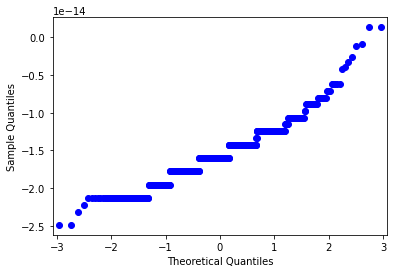

In [ ]:
res = regressor_ols.resid_pearson # pearson residuals
fig = sm.qqplot(res)
plt.show()

mean:  16.004155422869786
standart deviation:  2.002754807650919


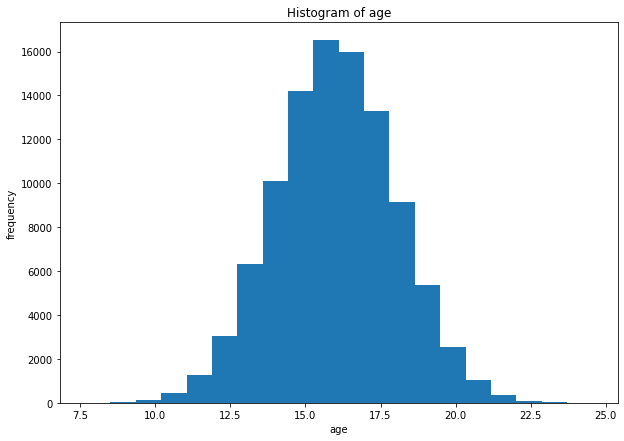

In [ ]:
# parameters of normal distribution
mu, sigma = 16, 2  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 20)
plt.ylabel("frequency")
plt.xlabel("age")
plt.title("Histogram of age")
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(SPD, x='G1', y='G2', z='G3',
              color=SPD['Grades'])
fig.show()

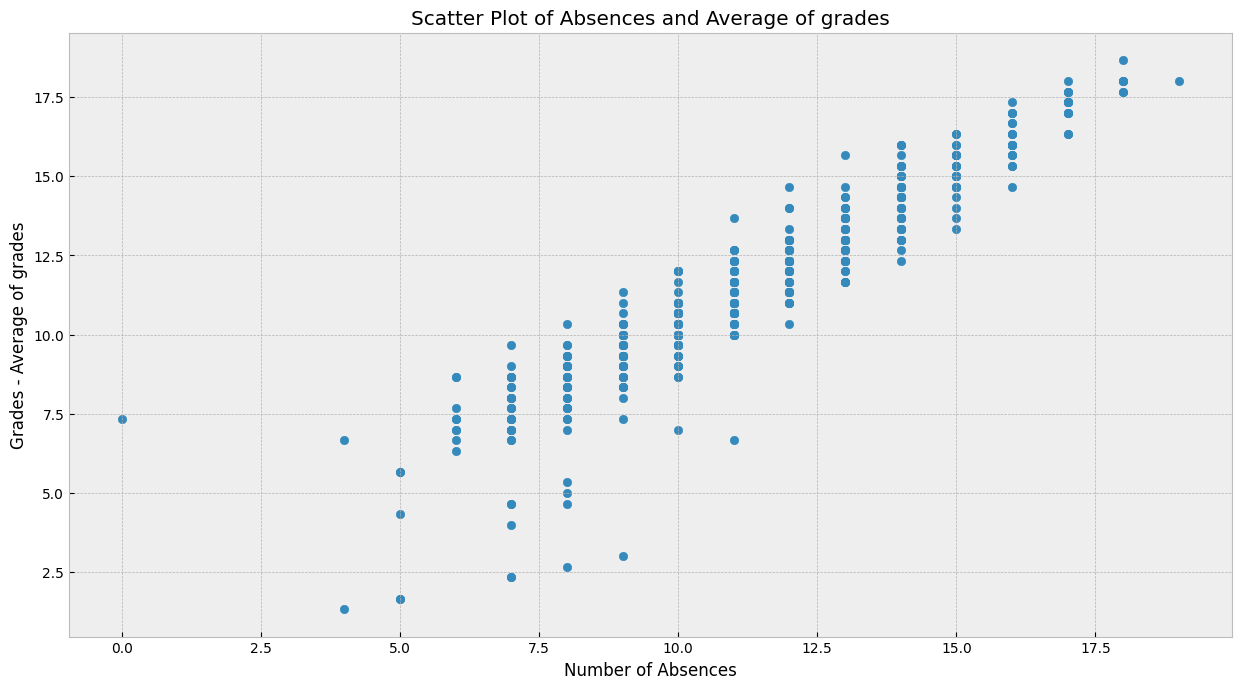

In [ ]:
Absences = SPD.iloc[:, -6].values
Grades_avg = SPD.iloc[:, -2].values

plt.figure(figsize=(15,8), dpi=100)
plt.style.use('bmh')
plt.xlabel('Number of Absences')
plt.ylabel('Grades - Average of grades')
plt.title('Scatter Plot of Absences and Average of grades')
plt.scatter(Absences,Grades_avg)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(SPD, x='school', y='Grades', z='avg_of_G1_G2_G3',
              color=SPD['school'])
fig.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Split dataset
X, y = SPD.iloc[:, :-1], SPD.iloc[:, -1]

In [ ]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print('Output', y.shape)

Input (649, 231)
Output (649,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
sm = SMOTE(sampling_strategy = 'auto', random_state=27)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train) #It's important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.
#Let's now fit our classifiers over our updated dataset!

In [ ]:
from imblearn import under_sampling, over_sampling

rus = under_sampling.RandomUnderSampler(random_state=1234)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train) 

ros = over_sampling.RandomOverSampler(random_state=1234)
X_train_os, y_train_os = ros.fit_resample(X_train, y_train) 

In [ ]:
assert len(X_train_smote) !=  len(X_train)
assert len(y_train_smote) != len(y_train) #confirming that we have a resampled dataset with synthetic values

In [ ]:
# Starified k cross validation
Kfold = StratifiedKFold(n_splits=10)

In [ ]:
RANDOM_STATE = 1
# I did tweak some of the hyperparameters with trial & error
classifiers = [LogisticRegression(max_iter=70, solver='liblinear', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.05, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]

In [ ]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes'
                     ]

In [ ]:
def gather_metrics_scores():
    train_accs1, test_accs1, precisions1, recalls1, cv_scores1, f1_scores1, train_accs2, test_accs2, precisions2, recalls2, cv_scores2,f1_scores2, train_accs3, test_accs3, precisions3, recalls3, cv_scores3, f1_scores3 = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    print ("***************SMOTE***************")
    print('\n')
    for classifier,classifier_name in zip(classifiers, classifiers_names):
        classifier.fit(X_train_smote, y_train_smote)
        train_acc1 =classifier.score(X_train_smote, y_train_smote)
        y_pred1 = classifier.predict(X_test)
        precision1 = precision_score(y_test, y_pred1, average='weighted')
        recall1 = recall_score(y_test, y_pred1, average='weighted')
        score1 = classifier.score(X_test, y_test)
        cv_score1 = cross_val_score(classifier, X_train_smote, y_train_smote, scoring='accuracy', cv=Kfold, n_jobs=-1)
        F1Score1 = f1_score(y_test, y_pred1, average='weighted')

        train_accs1.append(train_acc1)
        test_accs1.append(score1)
        precisions1.append(precision1)
        recalls1.append(recall1)
        cv_scores1.append(mean(cv_score1))
        f1_scores1.append(F1Score1)
        
          
    smote_scores = {'SMOTE Model': classifiers_names,
               'train_acc': np.array(train_accs1) * 100,
               'test_acc': np.array(test_accs1) * 100,
               'precision': np.array(precisions1) * 100,
               'recall': np.array(recalls1) * 100,
               'f1_score': np.array(f1_scores1) * 100,
               'Cross_val_score': np.array(cv_scores1) * 100}

    smote_scores = pd.DataFrame(smote_scores)
    print(smote_scores)
    print('\n')
    
    print("***************RUS***************")
    print('\n')
    for classifier,classifier_name in zip(classifiers, classifiers_names):
        classifier.fit(X_train_us, y_train_us)
        train_acc2 =classifier.score(X_train_us, y_train_us)
        y_pred2 = classifier.predict(X_test)
        precision2 = precision_score(y_test, y_pred2, average='weighted')
        recall2 = recall_score(y_test, y_pred2, average='weighted')
        score2 = classifier.score(X_test, y_test)
        cv_score2 = cross_val_score(classifier, X_train_us, y_train_us, scoring='accuracy', cv=Kfold, n_jobs=-1)
        F1Score2 = f1_score(y_test, y_pred2, average='weighted')

        train_accs2.append(train_acc2)
        test_accs2.append(score2)
        precisions2.append(precision2)
        recalls2.append(recall2)
        cv_scores2.append(mean(cv_score2))
        f1_scores2.append(F1Score2)
        
    RUS_scores = {'RUS Model': classifiers_names,
               'train_acc': np.array(train_accs2) * 100,
               'test_acc': np.array(test_accs2) * 100,
               'precision': np.array(precisions2) * 100,
               'recall': np.array(recalls2) * 100,
               'f1_score': np.array(f1_scores2) * 100,
               'Cross_val_score': np.array(cv_scores2) * 100}
    RUS_scores = pd.DataFrame(RUS_scores)
    print(RUS_scores)
    print('\n')

    print ("***************ROS***************")
    print('\n')
    for classifier,classifier_name in zip(classifiers, classifiers_names):
        classifier.fit(X_train_os, y_train_os)
        train_acc3 =classifier.score(X_train_os, y_train_os)
        y_pred3 = classifier.predict(X_test)
        precision3 = precision_score(y_test, y_pred3, average='weighted')
        recall3 = recall_score(y_test, y_pred3, average='weighted')
        score3 = classifier.score(X_test, y_test)
        cv_score3 = cross_val_score(classifier, X_train_os, y_train_os, scoring='accuracy', cv=Kfold, n_jobs=-1)
        F1Score3 = f1_score(y_test, y_pred3, average='weighted')
        
        train_accs3.append(train_acc3)
        test_accs3.append(score3)
        precisions3.append(precision3)
        recalls3.append(recall3)
        cv_scores3.append(mean(cv_score3))
        f1_scores3.append(F1Score3)
        
    ROS_scores = {'ROS Model': classifiers_names,
               'train_acc': np.array(train_accs3) * 100,
               'test_acc': np.array(test_accs3) * 100,
               'precision': np.array(precisions3) * 100,
               'recall': np.array(recalls3) * 100,
               'f1_score': np.array(f1_scores3) * 100,
               'Cross_val_score': np.array(cv_scores3) * 100}
    ROS_scores = pd.DataFrame(ROS_scores)
    print(ROS_scores)
    print('\n')

    return smote_scores, RUS_scores, ROS_scores
    

In [ ]:
smote_scores, RUS_scores, ROS_scores = gather_metrics_scores()

***************SMOTE***************


                    SMOTE Model   train_acc   test_acc  precision     recall  \
0           Logistic Regression  100.000000  96.923077  96.883307  96.923077   
1      Decision Tree Classifier   51.031390  22.307692  45.181319  22.307692   
2        Support Vector Machine  100.000000  97.692308  97.756410  97.692308   
3      Random Forest Classifier   97.668161  86.153846  86.642103  86.153846   
4           AdaBoost Classifier   78.834081  70.000000  74.338915  70.000000   
5  Gradient Boosting Classifier   99.641256  93.076923  93.320307  93.076923   
6        K Neighbors Classifier   86.367713  56.153846  76.512211  56.153846   
7          Gaussian Naive Bayes  100.000000  97.692308  97.631410  97.692308   

    f1_score  Cross_val_score  
0  96.865242        99.553571  
1  19.705799        50.682915  
2  97.611400       100.000000  
3  86.320473        96.599903  
4  70.975970        65.152831  
5  93.044289        98.659106  
6  58.666065     

In [ ]:
smote_scores

,SMOTE Model,train_acc,test_acc,precision,recall,f1_score,Cross_val_score
0,Logistic Regression,100.000000,96.923077,96.883307,96.923077,96.865242,99.553571
1,Decision Tree Classifier,51.031390,22.307692,45.181319,22.307692,19.705799,50.682915
2,Support Vector Machine,100.000000,97.692308,97.756410,97.692308,97.611400,100.000000
3,Random Forest Classifier,97.668161,86.153846,86.642103,86.153846,86.320473,96.599903
4,AdaBoost Classifier,78.834081,70.000000,74.338915,70.000000,70.975970,65.152831
5,Gradient Boosting Classifier,99.641256,93.076923,93.320307,93.076923,93.044289,98.659106
6,K Neighbors Classifier,86.367713,56.153846,76.512211,56.153846,58.666065,80.735199
7,Gaussian Naive Bayes,100.000000,97.692308,97.631410,97.692308,97.641411,99.909910


In [ ]:
RUS_scores

,RUS Model,train_acc,test_acc,precision,recall,f1_score,Cross_val_score
0,Logistic Regression,100.0,84.615385,85.898845,84.615385,84.888082,87.051282
1,Decision Tree Classifier,42.4,44.615385,37.401212,44.615385,34.237919,35.128205
2,Support Vector Machine,100.0,86.923077,87.165391,86.923077,86.881879,85.512821
3,Random Forest Classifier,97.6,80.769231,82.496670,80.769231,81.152188,78.205128
4,AdaBoost Classifier,66.4,63.846154,59.963967,63.846154,58.626298,49.423077
5,Gradient Boosting Classifier,100.0,86.153846,86.840753,86.153846,86.101331,92.756410
6,K Neighbors Classifier,74.4,60.769231,69.606797,60.769231,62.689877,60.705128
7,Gaussian Naive Bayes,100.0,93.846154,93.972494,93.846154,93.811834,95.192308


In [ ]:
ROS_scores

,ROS Model,train_acc,test_acc,precision,recall,f1_score,Cross_val_score
0,Logistic Regression,100.000000,97.692308,97.755102,97.692308,97.631410,99.910714
1,Decision Tree Classifier,43.856502,22.307692,45.181319,22.307692,19.705799,41.616795
2,Support Vector Machine,100.000000,97.692308,97.756410,97.692308,97.611400,100.000000
3,Random Forest Classifier,97.847534,86.923077,87.524939,86.923077,86.993007,96.773649
4,AdaBoost Classifier,42.242152,46.153846,46.061801,46.153846,33.460325,43.583494
5,Gradient Boosting Classifier,99.730942,93.846154,94.158223,93.846154,93.777855,99.013835
6,K Neighbors Classifier,91.748879,63.846154,69.401907,63.846154,65.210687,85.386100
7,Gaussian Naive Bayes,100.000000,98.461538,98.501603,98.461538,98.394769,99.909910


In [ ]:
from sklearn.cluster import *
kmeans = MiniBatchKMeans(n_clusters=5).fit(X)

In [ ]:
from numpy import unique,where
import matplotlib.pyplot as plt
import seaborn as sns
def plotModel(dataframe,model):
    df_model = dataframe
    pred = model.predict(X)
    df_model['Prediction'] = pred
    clusters = unique(pred)
    fg = sns.FacetGrid(data=SPD, hue='Prediction', aspect=1.61, size=10)
    fg.map(plt.scatter,'Grades', 'avg_of_G1_G2_G3',).add_legend()
    plt.show()

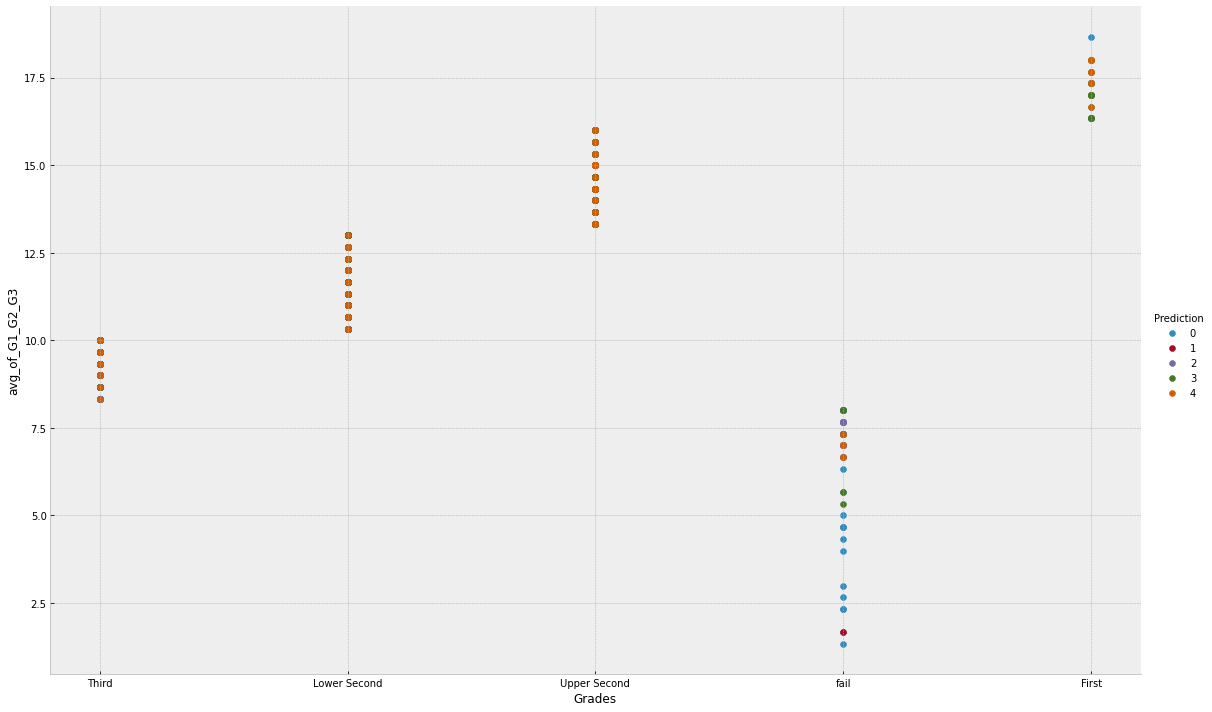

In [ ]:
plotModel(SPD,kmeans)

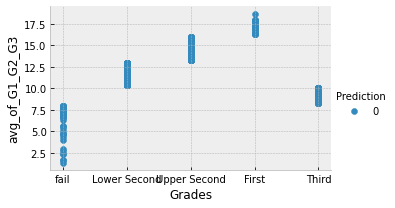

In [ ]:
#AgglomerativeClustering
op = OPTICS(min_samples=100).fit_predict(X)
df_op = SPD
pred = op
df_op['Prediction'] = pred
clusters = unique(pred)
fg = sns.FacetGrid(data=df_op, hue='Prediction', aspect=1.61)
fg.map(plt.scatter,'Grades', 'avg_of_G1_G2_G3', ).add_legend()
plt.show()

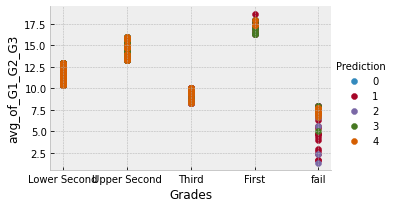

In [ ]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(X)
df_ac = SPD
pred = ac
df_ac['Prediction'] = pred
clusters = unique(pred)
fg = sns.FacetGrid(data=SPD, hue='Prediction', aspect=1.61)
fg.map(plt.scatter,'Grades', 'avg_of_G1_G2_G3', ).add_legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
linear1=LinearRegression().fit(X_train, y_train)  #Fit our model on x_train & y_train
accuracy=linear1.score(X_test,y_test)  
print(accuracy)

0.9894206248129801


In [ ]:
from sklearn.linear_model import LinearRegression
linear2=LinearRegression().fit(X_train_smote, y_train_smote)  #Fit our model on X_train_smote & y_train_smote
accuracy=linear2.score(X_test,y_test)  
print(accuracy)

0.9881676224009689


In [ ]:
from sklearn.linear_model import LinearRegression
linear3=LinearRegression().fit(X_train_os, y_train_os)  #Fit our model on X_train_os & y_train_os
accuracy=linear3.score(X_test,y_test)  
print(accuracy)

0.9901433013243857


In [ ]:
from sklearn.linear_model import LinearRegression
linear4=LinearRegression().fit(X_train_us, y_train_us)  #Fit our model on X_train_us & y_train_us
accuracy=linear4.score(X_test,y_test)  
print(accuracy)

0.6587875137452863


In [ ]:
predictions=linear2.predict(X_test)   #Call the predict function on x_test

predictions = np.around(predictions)
predictions = predictions.astype(int)


for i in range(len(predictions)):
  if(predictions[i] != y_test[i]):
    print (predictions[i],y_test[i])

3 4
3 4


In [ ]:
import sklearn
from sklearn import tree
import graphviz

In [ ]:
# ID3
clf = sklearn.tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(X_train_smote, y_train_smote)

dot_data = tree.export_graphviz(clf, out_file=None, max_depth= 2)
graph = graphviz.Source(dot_data)
graph.render("/content/student-por.csv")

graph

test_array = clf.predict(X_test).tolist()
ID3TestAccuracy = sklearn.metrics.accuracy_score(y_test, test_array)

print('ID3 Testing accuracy: ',ID3TestAccuracy)

train_array = clf.predict(X_train_smote).tolist()
ID3TrainAccuracy = sklearn.metrics.accuracy_score(y_train_smote, train_array)

print('ID3 Training accuracy: ',ID3TrainAccuracy)

ID3 Testing accuracy:  0.9307692307692308
ID3 Training accuracy:  1.0


In [ ]:
# C4.5
clf2 = sklearn.tree.DecisionTreeClassifier()

clf2.fit(X_train_smote, y_train_smote)

dot_data = tree.export_graphviz(clf2, out_file=None, max_depth= 2)
graph = graphviz.Source(dot_data)
graph.render("/content/student-por.csv")

graph

test_array2 = clf2.predict(X_test).tolist()
CTestAccuracy = sklearn.metrics.accuracy_score(y_test, test_array2)

print('C4.5 Testing accuracy: ',CTestAccuracy)

train_array2 = clf2.predict(X_train_smote).tolist()

CTrainAccuracy = sklearn.metrics.accuracy_score(y_train_smote, train_array2)

print('C4.5 Training accuracy: ', CTrainAccuracy)

C4.5 Testing accuracy:  0.9230769230769231
C4.5 Training accuracy:  1.0


In [ ]:
prediction_test = clf.predict(X_test).tolist()
print("TESTING DATA")
print('Confusion Matrix with Testing Data with ID3 Algorithm:')
print(confusion_matrix(y_test, prediction_test))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(y_test, prediction_test))
print()
print()
print("TRAINING DATA")
prediction_train = clf.predict(X_train_smote).tolist()

print('Confusion Matrix with Training Data with ID3 Algorithm:')
print(confusion_matrix(y_train_smote, prediction_train))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(y_train_smote, prediction_train))

prediction_train2 = clf2.predict(X_train_smote).tolist()

print("TESTING DATA")
print('Confusion Matrix with Testing Data with C4.5 Algorithm: ')
print(confusion_matrix(y_train_smote, prediction_train2))
print()
print('Classification Report C4.5 Algorithm:')
print(classification_report(y_train_smote, prediction_train2))
print()
print()
print("TRAINING DATA")
print('Confusion Matrix with Training Data with C4.5 Algorithm:')
print(confusion_matrix(y_train_smote, prediction_train2))
print()
print('Classification Report C4.5 Algorithm:')
print(classification_report(y_train_smote, prediction_train2))

TESTING DATA
Confusion Matrix with Testing Data with ID3 Algorithm:
[[ 9  1  0  0  0]
 [ 0 45  1  0  1]
 [ 0  1 29  0  1]
 [ 0  1  0 30  0]
 [ 0  2  1  0  8]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.90      0.96      0.93        47
           2       0.94      0.94      0.94        31
           3       1.00      0.97      0.98        31
           4       0.80      0.73      0.76        11

    accuracy                           0.93       130
   macro avg       0.93      0.90      0.91       130
weighted avg       0.93      0.93      0.93       130



TRAINING DATA
Confusion Matrix with Training Data with ID3 Algorithm:
[[223   0   0   0   0]
 [  0 223   0   0   0]
 [  0   0 223   0   0]
 [  0   0   0 223   0]
 [  0   0   0   0 223]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       1.00      1.00